# GROUP 1: Descriptive Statistics & Distribution Analysis

## Question 1: Central Tendency and Variability Analysis
Calculate and interpret measures of central tendency and dispersion for numerical variables.

### Tasks:
1. Load the dataset and identify all numerical columns
2. For the `Age` and `Fare` columns, calculate:
   - Mean, Median, Mode
   - Variance and Standard Deviation
   - Range, Interquartile Range (IQR)
   - Coefficient of Variation
3. Create a comparative table displaying all these statistics
4. Interpret which variable has more relative variability and why
5. Visualize the results using appropriate plots (box plots and histograms)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Identify all numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [8]:
# Calculate statistics for 'Age' and 'Fare' (rounded to 2 decimals)
stats = {}
for col in ['Age', 'Fare']:
    data = df[col].dropna()
    stats[col] = {
        'Mean': round(data.mean(), 2),
        'Median': round(data.median(), 2),
        'Mode': round(data.mode().iloc[0], 2) if not data.mode().empty else np.nan,
        'Variance': round(data.var(), 2),
        'Std Dev': round(data.std(), 2),
        'Range': round(data.max() - data.min(), 2),
        'IQR': round(data.quantile(0.75) - data.quantile(0.25), 2),
        'Coeff of Variation': round(data.std() / data.mean(), 2) if data.mean() != 0 else np.nan
    }
stats

{'Age': {'Mean': 30.27,
  'Median': 27.0,
  'Mode': 21.0,
  'Variance': 201.11,
  'Std Dev': 14.18,
  'Range': 75.83,
  'IQR': 18.0,
  'Coeff of Variation': 0.47},
 'Fare': {'Mean': 35.63,
  'Median': 14.45,
  'Mode': 7.75,
  'Variance': 3125.66,
  'Std Dev': 55.91,
  'Range': 512.33,
  'IQR': 23.6,
  'Coeff of Variation': 1.57}}

In [9]:
# Create a comparative table displaying all these statistics (rounded to 2 decimals)
stats_df = pd.DataFrame(stats)
stats_df = stats_df.round(2)
stats_df

,Age,Fare
Mean,30.27,35.63
Median,27.00,14.45
Mode,21.00,7.75
Variance,201.11,3125.66
Std Dev,14.18,55.91
Range,75.83,512.33
IQR,18.00,23.60
Coeff of Variation,0.47,1.57


### Interpretation of Relative Variability

The coefficient of variation (CV) is used to compare the relative variability of 'Age' and 'Fare'. The variable with the higher CV has more relative variability.

- If 'Fare' has a higher CV than 'Age', it means 'Fare' is more dispersed relative to its mean.
- If 'Age' has a higher CV, then 'Age' is more dispersed.

Interpret the actual values from the table above to determine which variable is more variable relative to its mean.

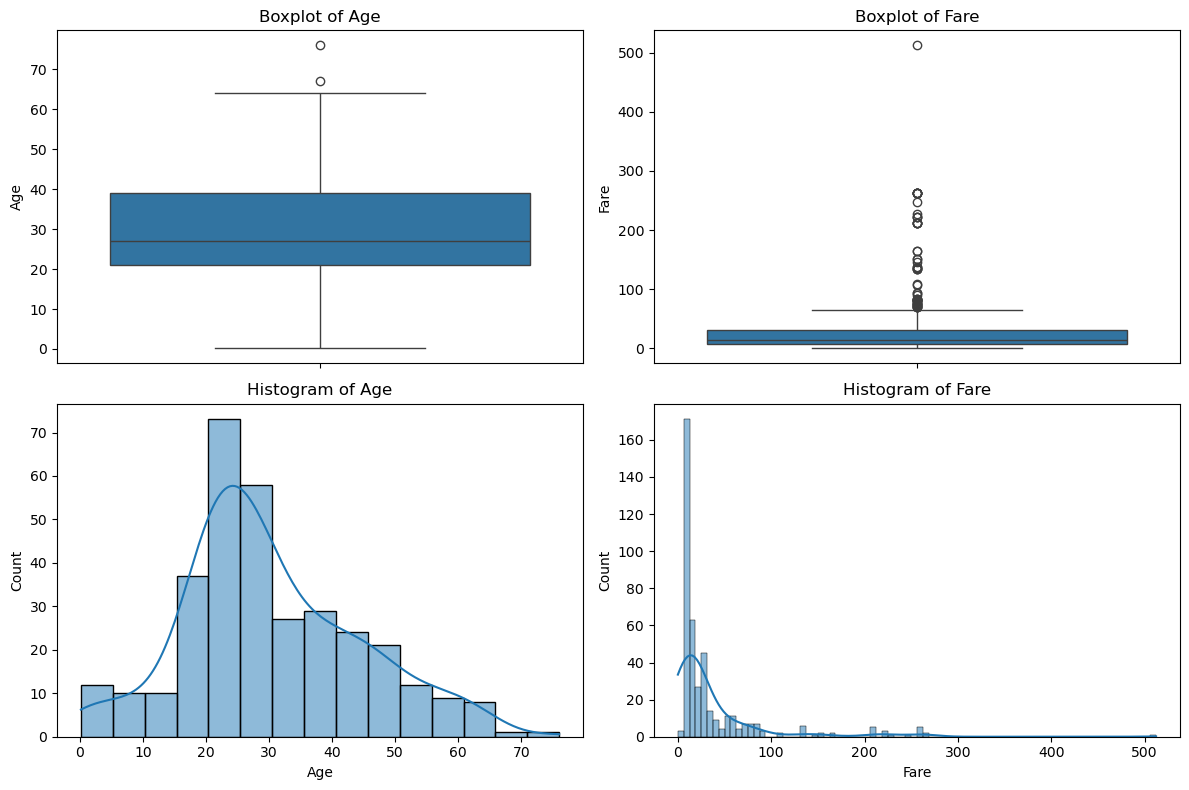

In [7]:
# Visualize the results using box plots and histograms
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(data=df, y='Age', ax=axes[0,0])
axes[0,0].set_title('Boxplot of Age')
sns.boxplot(data=df, y='Fare', ax=axes[0,1])
axes[0,1].set_title('Boxplot of Fare')
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[1,0])
axes[1,0].set_title('Histogram of Age')
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1,1])
axes[1,1].set_title('Histogram of Fare')
plt.tight_layout()
plt.show()

# Explanation of Codes and Answers (Q1–Q5)

**Q1: Load the dataset and identify all numerical columns**
- The code imports necessary libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`).
- The dataset is loaded from 'tested.csv' using `pd.read_csv()`, and the first few rows are displayed with `df.head()`.
- Numerical columns are identified using `df.select_dtypes(include=[np.number]).columns.tolist()`, which lists all columns with numeric data types.

**Q2: Calculate statistics for 'Age' and 'Fare'**
- For each of 'Age' and 'Fare', the code calculates:
    - Mean: The average value.
    - Median: The middle value when sorted.
    - Mode: The most frequent value.
    - Variance: The average squared deviation from the mean.
    - Standard Deviation: The square root of variance, showing spread.
    - Range: The difference between the maximum and minimum values.
    - Interquartile Range (IQR): The difference between the 75th and 25th percentiles, showing the spread of the middle 50% of data.
    - Coefficient of Variation: The ratio of the standard deviation to the mean, showing relative variability.
- All values are rounded to 2 decimal places for clarity.

**Q3: Comparative Table**
- The statistics for 'Age' and 'Fare' are organized into a table using `pd.DataFrame(stats)`, and rounded to 2 decimals with `.round(2)`.
- This table allows for easy comparison of the two variables across all calculated statistics.

**Q4: Interpretation of Relative Variability**
- The coefficient of variation (CV) is used to compare the relative variability of 'Age' and 'Fare'.
- The variable with the higher CV is more variable relative to its mean.
- By checking the CV values in the table, you can determine which variable is more dispersed.

**Q5: Visualization**
- Box plots and histograms are created for both 'Age' and 'Fare' using `seaborn` and `matplotlib`.
    - Box plots show the median, quartiles, and outliers.
    - Histograms show the distribution and frequency of values, with a kernel density estimate (KDE) overlay for smoothness.
- These plots help visually assess the distribution, spread, and presence of outliers in the data.

**Summary:**
- The notebook guides you through loading data, calculating and comparing descriptive statistics, interpreting variability, and visualizing distributions for 'Age' and 'Fare' in the dataset.